In [9]:
import networkx as nx
import numpy as np

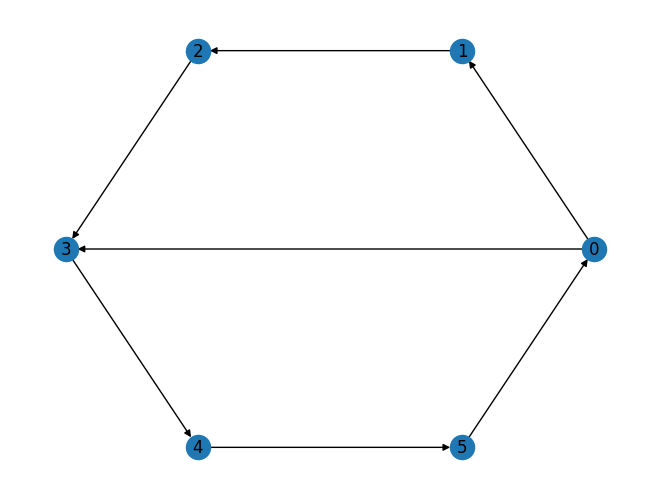

In [17]:
G = nx.cycle_graph(6, create_using=nx.DiGraph())
G.add_edge(0, 3)
nx.draw_circular(G, with_labels=True)

for e in G.edges():
    G[e[0]][e[1]]["a"] = G[e[0]][e[1]]["b"] = 100
G[0][3]["a"] = G[0][3]["b"] = 1

In [13]:
C = nx.incidence_matrix(G, oriented=True).todense()
C.astype(int)

array([[-1, -1,  0,  0,  0,  0,  1],
       [ 1,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  1, -1,  0,  0,  0],
       [ 0,  1,  0,  1, -1,  0,  0],
       [ 0,  0,  0,  0,  1, -1,  0],
       [ 0,  0,  0,  0,  0,  1, -1]])

In [15]:
d = np.array([[-10, 0, 0, 10, 0, 0]]).T

In [16]:
A = np.diag(list(nx.get_edge_attributes(G, "a").values()))
print(A.diagonal())

[100   1 100 100 100 100 100]


In [7]:
Q = np.linalg.inv(A.T @ A)
x0 = Q @ C.T @ np.linalg.pinv(C @ Q @ C.T) @ d
x0.T.round()

array([[ 0.,  1.,  0.,  0., -0., -0., -0.]])

In [8]:
(C @ x0).T.astype(int)

array([[-1,  0,  0,  1,  0,  0]])